In [20]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

conn = psycopg2.connect(
    host="localhost",
    database="HAL",
    user="postgres",
    password="6996"
)


In [21]:

query = "SELECT * FROM car_data;"
data = pd.read_sql_query(query, conn)

total_rows = len(data)
total_rows_and_columns = data.shape
print("Общее количество строк:", total_rows)
print("Количество строк и столбцов:", total_rows_and_columns)

data.info()


Общее количество строк: 32
Количество строк и столбцов: (32, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


C:\Users\Dias\AppData\Local\Temp\ipykernel_10484\1045029609.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql_query(query, conn)


In [22]:

unique_models = data['model'].unique()
print("Уникальные модели автомобилей:", unique_models)


Уникальные модели автомобилей: ['Mazda RX4' 'Mazda RX4 Wag' 'Datsun 710' 'Hornet 4 Drive'
 'Hornet Sportabout' 'Valiant' 'Duster 360' 'Merc 240D' 'Merc 230'
 'Merc 280' 'Merc 280C' 'Merc 450SE' 'Merc 450SL' 'Merc 450SLC'
 'Cadillac Fleetwood' 'Lincoln Continental' 'Chrysler Imperial' 'Fiat 128'
 'Honda Civic' 'Toyota Corolla' 'Toyota Corona' 'Dodge Challenger'
 'AMC Javelin' 'Camaro Z28' 'Pontiac Firebird' 'Fiat X1-9' 'Porsche 914-2'
 'Lotus Europa' 'Ford Pantera L' 'Ferrari Dino' 'Maserati Bora'
 'Volvo 142E']


In [23]:

print(data.head())  # Первые 5 строк
print(data.tail())  # Последние 5 строк


               model   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear   
0          Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4  \
1      Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
2         Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
3     Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
4  Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

   carb  
0     4  
1     4  
2     1  
3     1  
4     2  
             model   mpg  cyl   disp   hp  drat     wt  qsec  vs  am  gear   
27    Lotus Europa  30.4    4   95.1  113  3.77  1.513  16.9   1   1     5  \
28  Ford Pantera L  15.8    8  351.0  264  4.22  3.170  14.5   0   1     5   
29    Ferrari Dino  19.7    6  145.0  175  3.62  2.770  15.5   0   1     5   
30   Maserati Bora  15.0    8  301.0  335  3.54  3.570  14.6   0   1     5   
31      Volvo 142E  21.4    4  121.0  109  4.11  2.780  18.6   

In [24]:

# Статистическое описание:
print(data.describe())


             mpg        cyl        disp          hp       drat         wt   
count  32.000000  32.000000   32.000000   32.000000  32.000000  32.000000  \
mean   20.090625   6.187500  230.721875  146.687500   3.596563   3.217250   
std     6.026948   1.785922  123.938694   68.562868   0.534679   0.978457   
min    10.400000   4.000000   71.100000   52.000000   2.760000   1.513000   
25%    15.425000   4.000000  120.825000   96.500000   3.080000   2.581250   
50%    19.200000   6.000000  196.300000  123.000000   3.695000   3.325000   
75%    22.800000   8.000000  326.000000  180.000000   3.920000   3.610000   
max    33.900000   8.000000  472.000000  335.000000   4.930000   5.424000   

            qsec         vs         am       gear     carb  
count  32.000000  32.000000  32.000000  32.000000  32.0000  
mean   17.848750   0.437500   0.406250   3.687500   2.8125  
std     1.786943   0.504016   0.498991   0.737804   1.6152  
min    14.500000   0.000000   0.000000   3.000000   1.0000  
2

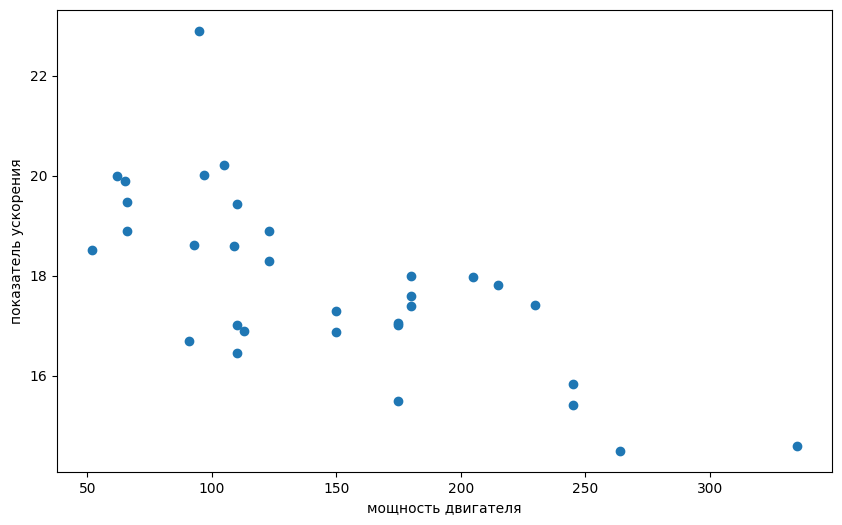

In [25]:

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(data['hp'], data['qsec'])
ax.set_xlabel('мощность двигателя')
ax.set_ylabel('показатель ускорения')
plt.show()


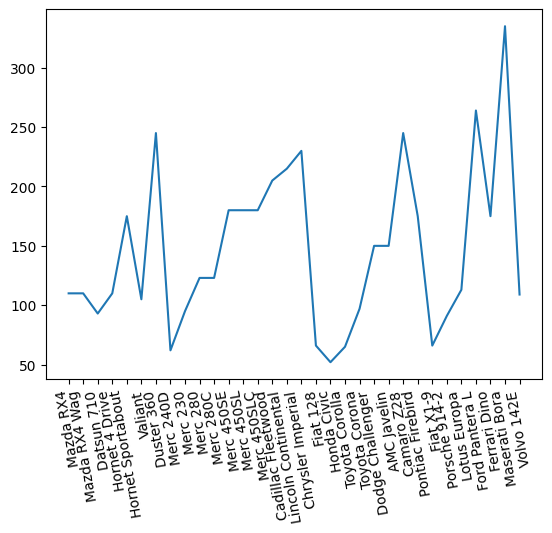

In [26]:

plt.plot(data['model'].tail(50), data['hp'].tail(50))
plt.xticks(rotation=100)
plt.show() #гистограмма модели авто по мощностям


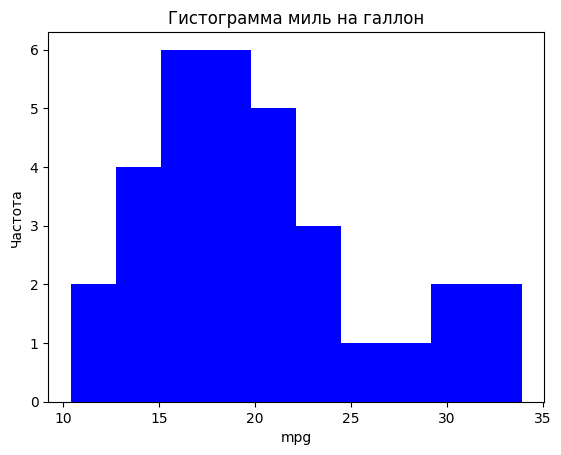

In [27]:

# Визуализация данных:
plt.hist(data['mpg'], bins=10, color='blue')
plt.xlabel('mpg')
plt.ylabel('Частота')
plt.title('Гистограмма миль на галлон')
plt.show()


conn.close()
